# **Tarea #9**
## Por: Mariana Toro Escobar y Juan Esteban Ospina Holguín

 Figure 5.7 shows a current loop of radius a carrying a current I. The point P
is a distance r from the center of the loop with spherical coordinates (r, θ, φ).
Jackson (1988) solves for the φ component of the vector potential at point P
in terms of elliptic integrals:

\begin{equation}
A_{\phi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
\end{equation}


where 

\begin{equation}
K(k)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}


\begin{equation}
E(k)=\int_{0}^{\pi/2} \mathrm{d\phi} \sqrt{1-k^2\sin^2\phi}
\end{equation}


\begin{equation}
k^2=\frac{4ar\sin\theta}{a^2+r^2+2ar\sin\theta}
\end{equation}



Here K(k) is a complete elliptic integral of the first kind and E(k) is a complete
elliptic integral of the second kind. For a = 1, I = 3, and μ0∕4π = 1, compute
and plot

a) Aφ(r = 1.1, θ) vs. θ.
b) Aφ(r, θ = π∕3) vs. r


#Resolver el punto b

In [1]:
#Librerías
import numpy as np
import matplotlib.pylab as plt
import sympy as sp
from scipy import integrate
from scipy import  optimize

In [2]:
E = lambda k, phi: np.sqrt( 1 - (k * np.sin(phi)) **2 )#Itegrando de la función E(k)
K = lambda k, phi: 1./np.sqrt( 1 - (k * np.sin(phi)) **2 ) #Integrando de la función K(k)

def k2(r, θ, a):  #Función para k^2
  p = 4*a*r*np.sin(θ)
  q = a**2+r**2+2*a*r*np.sin(θ) 
  return p/q

def A(r, θ, ϕ, a, I):#Función para el potencial A
  
  num1 = 4*I*a
  den1 = np.sqrt( a**2 + r**2 + 2*a*r*np.sin(θ))
  frac1 = num1/den1#Fracción antes del parentesis 

  k_2 = k2(r, θ, a)
  factor1 = (2 - k_2)
  factor2 = integrate.trapz(  K(np.sqrt(k_2), ϕ), ϕ) #Integral de K
  factor3 = factor1*factor2
  factor4 =  integrate.trapz(  E(np.sqrt(k_2), ϕ), ϕ) #Integral de E
  A = frac1*(factor3- 2*factor4)/k_2 #Se junta todo para A

  return A

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


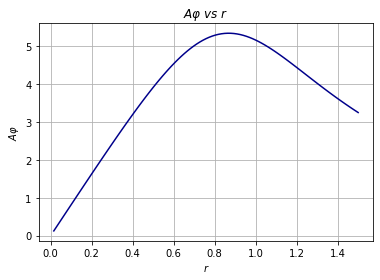

In [11]:
θ = np.pi/3 # Valor inicial
a = 1 # Radio de la espira
I = 3 #Corriente 
N = 100 #Contador


r = np.linspace(0, 1.5, N)#Espacio para r
ϕ = np.linspace(0, np.pi/2, N) #Espacio para el angulo ϕ 

B = np.zeros(len(r))

for i, p in enumerate(r):
    B[i] = A(p, θ, ϕ, a, I )#Se calcula A para cada
plt.plot(r, B,color = 'darkblue')
plt.xlabel("$r$")
plt.ylabel("$Aφ$")
plt.title("$Aφ \ vs \ r $")
plt.grid();